In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('loyalty_sub_info2.dsv', encoding = 'utf8')

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,14,15,17,27,28,38,45,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_1 = data[['SEX','TOT_REV','SMILE_BALANCE','LOYALTY_POINTS_REDEEMED','LOYALTY_POINTS_BALANCE']]

In [3]:
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns
%matplotlib inline

In [9]:
data_2 = data_1.loc[data_1['LOYALTY_POINTS_REDEEMED'] > 0]


In [10]:
data_3 = data_2.dropna(subset=['SEX'])

In [11]:
data_4 = data_3.loc[data_3['LOYALTY_POINTS_BALANCE'] <= 15000]

In [12]:
data_5 = data_4.loc[data_4['TOT_REV'] <= 15000]

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


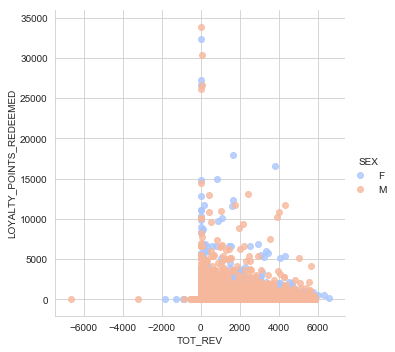

In [13]:
sns.set_style('whitegrid')
sns.lmplot('TOT_REV','LOYALTY_POINTS_REDEEMED',data=data_5, hue='SEX',
           palette='coolwarm',size=5,aspect=1,fit_reg=False)

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


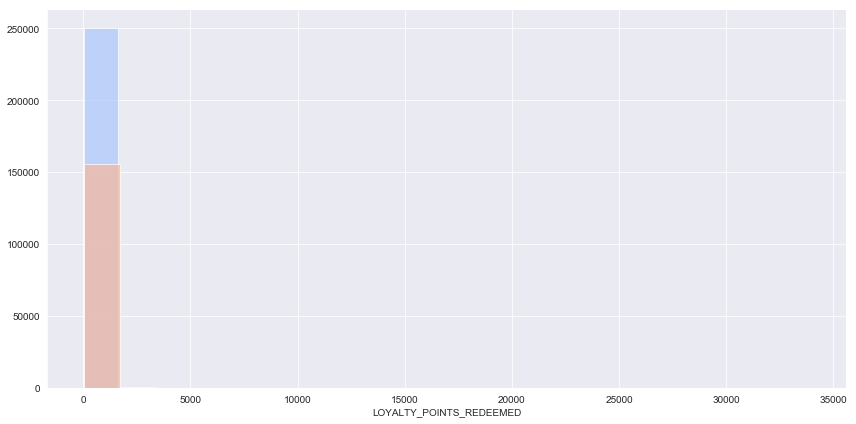

In [15]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data_5,hue="SEX",palette='coolwarm',size=6,aspect=2)
g = g.map(mat.hist,'LOYALTY_POINTS_REDEEMED',bins=20,alpha=0.7)

In [4]:
from sklearn.cluster import SpectralClustering

In [5]:
from sklearn.cluster import KMeans

In [18]:
kvalues = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in kvalues]

In [19]:
yay = kmeans.fit(data_5.drop('SEX',axis=1))

AttributeError: 'list' object has no attribute 'fit'

In [20]:
kmeans.cluster_centers_

AttributeError: 'list' object has no attribute 'cluster_centers_'

In [ ]:
#Model Evaluation

In [22]:
def converter(cluster):
    if (cluster == 20):
        return 0
    elif (cluster == 40):
        return 1
    elif (cluster == 60):
        return 2
    elif (cluster == 80):
        return 3
    else:
        return 4

In [23]:
data_5['Cluster'] = data_5['LOYALTY_POINTS_REDEEMED'].apply(converter)

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(data_5['Cluster'],kmeans.labels_))

AttributeError: 'list' object has no attribute 'labels_'

In [25]:
first = data_5.loc[data_5['Cluster'] == 4]

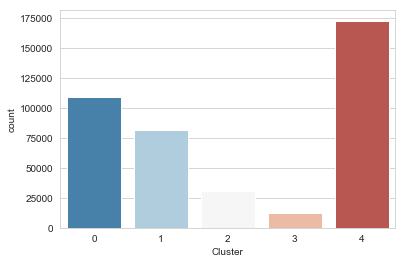

In [26]:
#Gender rates
sns.set_style('whitegrid')
sns.countplot(x='Cluster',data=data_5,palette='RdBu_r')

In [27]:
first.count()

SEX                        173108
TOT_REV                    173108
SMILE_BALANCE              173108
LOYALTY_POINTS_REDEEMED    173108
LOYALTY_POINTS_BALANCE     173108
Cluster                    173108
dtype: int64

In [28]:
data_5.nlargest(10, 'LOYALTY_POINTS_REDEEMED')

,SEX,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE,Cluster
24019,M,0.000000,1125.0000,33900.0,1105.0000,4
114414,F,1.008772,10419.2949,32400.0,10399.2949,4
358649,M,59.950269,189.0000,30300.0,5907.3300,4
60764,F,0.000000,396.0000,27200.0,376.0000,4
349256,F,18.189205,3435.0000,26600.0,3415.0000,4
414027,M,37.873295,3435.0000,26600.0,3415.0000,4
69464,M,0.000000,68.8000,26100.0,3444.8000,4
1127909,F,1649.017242,303.0000,17900.0,283.0000,4
1477488,F,3778.223152,109.0741,16600.0,64.7841,4
1199965,F,837.743728,3025.0000,15000.0,19.8300,4


In [29]:
kmeans.labels_

AttributeError: 'list' object has no attribute 'labels_'

In [ ]:
#

In [102]:
from sklearn.datasets import make_blobs

In [100]:
samp = make_blobs(n_samples=200, n_features=2, 
                           centers=6, cluster_std=1.8,random_state=101)

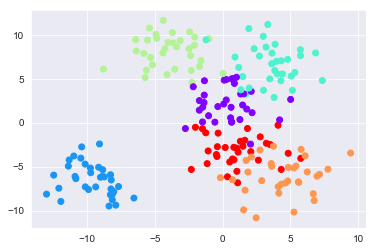

In [96]:
mat.scatter(samp[0][:,0],samp[0][:,1],c=samp[1],cmap='rainbow')

In [30]:
data_5.count()

SEX                        406731
TOT_REV                    406731
SMILE_BALANCE              406731
LOYALTY_POINTS_REDEEMED    406731
LOYALTY_POINTS_BALANCE     406731
Cluster                    406731
dtype: int64

In [ ]:
#

In [31]:
data_tab = data[['SEX','FIRST_USAGE_DATE','TARIFF_TYPE','CONS_TYPE','HS_MAKE','BTS_MU_PROVINCE','REV_DATA_TOTAL','REV_VOICE_ONNET','REV_VOICE_OFFNET','REV_SMS_ONNET','REV_SMS_OFFNET','TOT_REV','SMILE_BALANCE','LOYALTY_POINTS_REDEEMED','LOYALTY_POINTS_BALANCE']]

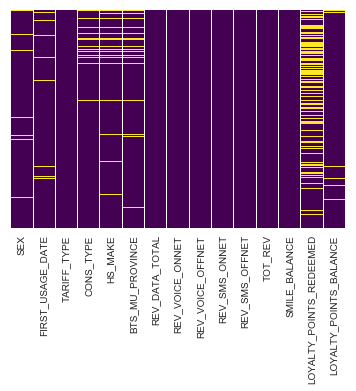

In [32]:
sns.heatmap(data_tab.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#new model

In [6]:
data_for = data[['REV_DATA_TOTAL','REV_VOICE_ONNET','REV_VOICE_OFFNET','REV_SMS_ONNET','REV_SMS_OFFNET','TOT_REV','SMILE_BALANCE','LOYALTY_POINTS_REDEEMED','LOYALTY_POINTS_BALANCE']]

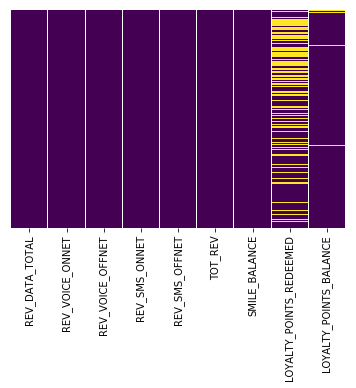

In [8]:
sns.heatmap(data_for.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
data_for_1 = data_for[data_for['LOYALTY_POINTS_REDEEMED']>0]

In [11]:
#data_for_1.to_csv('data.csv')

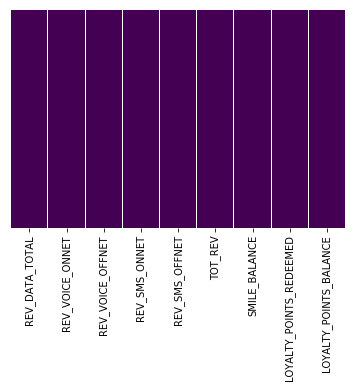

In [14]:
sns.heatmap(data_for_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
da = data_for_1.dropna()

In [9]:
kvalues = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in kvalues]

In [10]:
score = [kmeans[i].fit(da).score(da) for i in range(len(kmeans))]

In [11]:
import pylab as pl

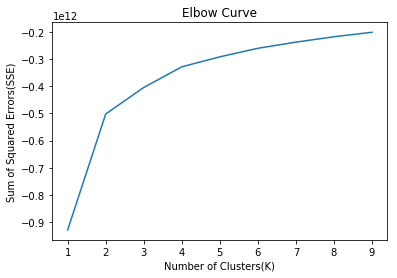

In [12]:
pl.plot(kvalues,score)
pl.xlabel('Number of Clusters(K)')
pl.ylabel('Sum of Squared Errors(SSE)')
pl.title('Elbow Curve')
pl.show()

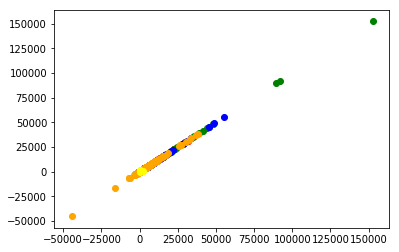

In [16]:
kmeans2=KMeans(n_clusters=4)
clusters=kmeans2.fit_predict(da)
da["Cluster"]=clusters

mat.scatter(da.loc[da.Cluster==0],da.loc[da.Cluster==0],color="red")
mat.scatter(da.loc[da.Cluster==1],da.loc[da.Cluster==1],color="green")
mat.scatter(da.loc[da.Cluster==2],da.loc[da.Cluster==2],color="blue")
mat.scatter(da.loc[da.Cluster==3],da.loc[da.Cluster==3],color="orange")
mat.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
mat.show()

In [14]:
#da = da.drop('Cluster', axis = 1)

In [24]:
da['BTS_MU_PROVINCE'] = data['BTS_MU_PROVINCE']

In [17]:
da['Cluster'].count()

423621

In [18]:
user_0 = da.loc[da['Cluster']==0]

In [19]:
user_0.head()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE,Cluster
40,0.0,940.0,0.0,0.0,0.0,959.457999,59.7300,100.0,39.7300,0
903,2778.0,690.0,2224.0,0.0,50.0,0.000000,67.0000,40.0,1.0000,0
1558,0.0,0.0,0.0,0.0,0.0,2168.900000,111.4500,9350.0,91.4500,0
23040,1252.0,3336.0,523.0,0.0,288.0,0.000000,9.7804,360.0,4.7804,0
24753,2000.0,1913.0,4196.0,0.0,0.0,0.000000,33.7000,120.0,0.0000,0


In [20]:
user_1 = da.loc[da['Cluster']==1]

In [21]:
user_1.head()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE,Cluster
230,132.0,1610.0,170.0,400.0,0.0,2401.296919,45.8800,600.0,25.6800,1
957,507.0,16497.0,7013.0,600.0,150.0,0.000000,151.6584,200.0,21.8984,1
1514,0.0,4401.0,2486.0,130.0,178.0,0.000000,88.1255,100.0,32.2755,1
16403,0.0,0.0,0.0,0.0,0.0,35989.480345,595.5500,350.0,766.5500,1
21468,1.0,6824.0,6193.0,703.0,404.0,0.000000,164.7454,100.0,56.6254,1


In [22]:
user_2 = da.loc[da['Cluster']==2]

In [23]:
user_2.head()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE,Cluster
931,16418.0,1022.0,222.0,205.0,72.0,0.0,290.9400,120.0,166.1700,2
1009,14939.0,15274.0,4080.0,0.0,0.0,0.0,544.1215,350.0,363.7815,2
1060,10485.0,11297.0,1842.0,663.0,204.0,0.0,121.3189,400.0,4.3589,2
1140,55220.0,15500.0,9228.0,150.0,250.0,0.0,153.3062,1110.0,224.7562,2
1534,20782.0,3863.0,3094.0,0.0,0.0,0.0,51.9840,400.0,49.2540,2


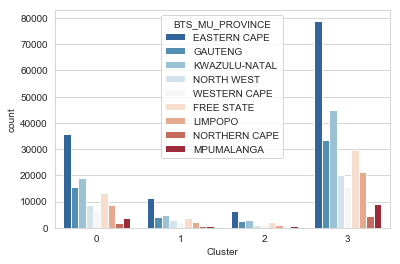

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Cluster',hue='BTS_MU_PROVINCE',data=da,palette='RdBu_r')

In [59]:
da['FIRST_USAGE_DATE'] = data['FIRST_USAGE_DATE']

In [60]:
da.head()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE,Cluster,SEX,HS_MAKE,TARIFF_TYPE,CONS_TYPE,BTS_MU_PROVINCE,FIRST_USAGE_DATE
1,50.0,0.0,0.0,0.0,0.0,50.438596,52.00,20.0,183.00,0,F,Samsung,MTN Base,VL,EASTERN CAPE,17-MAY-2018 00:00:00
4,-44435.0,720.0,200.0,0.0,0.0,1775.124338,87.00,470.0,32.00,0,F,Mobicel,MTN Base,VL,GAUTENG,09-MAY-2018 00:00:00
8,600.0,-1713.0,-898.0,200.0,0.0,-6655.759243,432.48,60.0,412.48,0,M,Nokia,MTN Base,VL,KWAZULU-NATAL,04-JUL-2018 21:08:30
11,0.0,-6473.0,-407.0,0.0,0.0,-6865.850082,412.90,20.0,264.90,0,NaN,itel,MTN Base,VL,KWAZULU-NATAL,06-MAY-2018 00:00:00
12,0.0,-295.0,-2906.0,0.0,0.0,-3215.873152,164.15,40.0,162.65,0,M,MOBICEL,Pep Club MTN Base,VL,KWAZULU-NATAL,07-JUN-2018 00:00:00


In [61]:
data_clustering = da

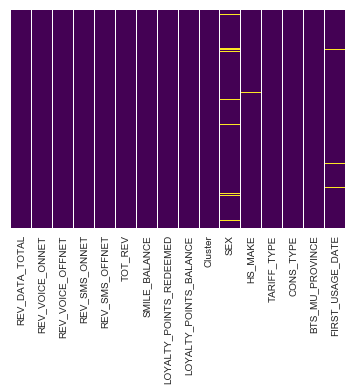

In [63]:
sns.heatmap(data_clustering.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#clusters data

In [69]:
clust_1 = data_clustering.loc[data_clustering['Cluster']== 0]
clust_2 = data_clustering.loc[data_clustering['Cluster']== 1]
clust_3 = data_clustering.loc[data_clustering['Cluster']== 2]
clust_4 = data_clustering.loc[data_clustering['Cluster']== 3]

In [81]:
## First Cluster data description from first cluster
clust_1.drop('Cluster', axis=1).describe()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE
count,258598.000000,258598.000000,258598.000000,258598.000000,258598.000000,258598.000000,258598.000000,258598.000000,258598.000000
mean,21.223236,46.611325,19.922264,3.334442,1.948329,204.195909,68.194565,93.344573,57.297554
std,129.121266,115.696494,72.996312,22.689813,17.084050,243.822414,175.968900,248.850569,181.114772
min,-44435.000000,-6473.000000,-2906.000000,0.000000,0.000000,-6865.850082,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,5.730795,26.290000,20.000000,18.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,83.645874,46.540000,60.000000,31.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,351.978732,75.000000,100.000000,59.871775
max,2403.000000,1996.000000,2064.000000,850.000000,800.000000,1775.124338,37128.660900,33900.000000,38608.660900


In [89]:
#top 10 spenders from first cluster
d = clust_1.nlargest(10, 'LOYALTY_POINTS_REDEEMED')

In [92]:
#cluster one description of top 10 spender
d.drop('Cluster', axis=1).describe()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE
count,10.0,10.000000,10.000000,10.0,10.00000,10.000000,10.000000,10.000000,10.000000
mean,0.0,0.100000,6.600000,0.0,60.00000,145.210186,4079.551890,26015.000000,4534.467890
std,0.0,0.316228,13.914022,0.0,189.73666,287.452130,5952.674549,6418.638225,5436.425162
min,0.0,0.000000,0.000000,0.0,0.00000,0.000000,68.800000,14850.000000,19.830000
25%,0.0,0.000000,0.000000,0.0,0.00000,0.000000,245.250000,26225.000000,558.250000
50%,0.0,0.000000,0.000000,0.0,0.00000,9.598988,2075.000000,26900.000000,3415.000000
75%,0.0,0.000000,0.000000,0.0,0.00000,54.431025,3435.000000,29525.000000,5291.697500
max,0.0,1.000000,33.000000,0.0,600.00000,837.743728,18507.424000,33900.000000,17087.424000


In [ ]:
# cluster 2

In [93]:
# data description for cluster 2
clust_2.drop('Cluster', axis=1).describe()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE
count,32636.000000,32636.000000,32636.000000,32636.000000,32636.000000,32636.000000,32636.000000,32636.000000,32636.000000
mean,134.110902,1792.909751,554.257507,58.325990,23.982933,3133.737421,70.685732,99.545287,58.051239
std,327.455358,1589.642019,729.950065,154.762603,86.437812,836.380638,137.747345,195.311308,135.928930
min,-2735.000000,-171.000000,-127.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,1182.000000,39.000000,0.000000,0.000000,2522.938596,23.591650,40.000000,18.420000
50%,0.000000,1716.000000,298.000000,0.000000,0.000000,2972.636730,49.870000,60.000000,35.257550
75%,58.000000,2245.000000,812.000000,50.000000,0.000000,3590.336488,84.605000,100.000000,64.990000
max,15954.000000,152973.000000,45740.000000,5536.000000,3350.000000,35989.480345,9741.264000,16600.000000,11521.264000


In [94]:
#top 10 spenders in cluster 2
e = clust_2.nlargest(10, 'LOYALTY_POINTS_REDEEMED')

In [95]:
#description of top 10 spenders in cluster 2
e.drop('Cluster', axis=1).describe()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE
count,10.000000,10.00000,10.000000,10.0,10.000000,10.000000,10.000000,10.00000,10.000000
mean,102.500000,1773.50000,1164.600000,0.0,10.000000,3519.461933,1451.114300,7200.00000,1301.941300
std,322.730452,938.03142,1048.289527,0.0,31.622777,1027.085282,2608.502454,4497.40666,2437.733503
min,0.000000,535.00000,0.000000,0.0,0.000000,2150.235702,46.110000,3000.00000,26.110000
25%,0.000000,1185.25000,311.000000,0.0,0.000000,2695.386268,109.555575,3825.00000,66.078075
50%,0.000000,1705.50000,965.000000,0.0,0.000000,3538.624451,153.660000,5700.00000,82.160000
75%,0.000000,2369.00000,1957.500000,0.0,0.000000,3935.017885,728.800800,9975.00000,683.828300
max,1021.000000,3532.00000,3082.000000,0.0,100.000000,5617.733860,7075.656900,16600.00000,6981.106900


In [ ]:
#cluster 3

In [96]:
# data description for cluster 3
clust_3.drop('Cluster', axis=1).describe()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE
count,113652.000000,113652.000000,113652.000000,113652.000000,113652.000000,113652.000000,113652.000000,113652.000000,113652.000000
mean,221.573208,508.399887,228.527572,23.839141,14.476393,1432.379335,74.058437,99.730229,62.508679
std,386.927967,429.300830,335.253530,77.669906,61.642501,447.417703,217.757830,204.060369,224.277819
min,-1264.000000,-550.000000,-361.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,110.000000,0.000000,0.000000,0.000000,1057.012431,25.000000,40.000000,18.080000
50%,0.000000,448.000000,71.000000,0.000000,0.000000,1356.706894,48.820000,60.000000,33.310000
75%,300.000000,803.000000,338.000000,0.000000,0.000000,1721.867754,82.003125,100.000000,64.050000
max,2778.000000,3389.000000,4196.000000,2500.000000,2448.000000,3213.667900,31518.201200,17900.000000,31498.201200


In [97]:
#top 10 spenders in cluster 3
f = clust_3.nlargest(10, 'LOYALTY_POINTS_REDEEMED')

In [98]:
#description of top 10 spenders in cluster 3
f.drop('Cluster', axis=1).describe()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE
count,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.00000,10.000000
mean,201.800000,147.700000,288.400000,0.0,0.0,1539.929845,3684.276660,11570.00000,4112.109660
std,420.725775,288.302715,663.778109,0.0,0.0,490.970286,9307.607808,2627.12348,9514.811618
min,0.000000,0.000000,0.000000,0.0,0.0,1014.253635,48.303000,8500.00000,57.926300
25%,0.000000,0.000000,0.000000,0.0,0.0,1063.590394,135.278750,10100.00000,105.434025
50%,0.000000,16.500000,23.500000,0.0,0.0,1619.553207,227.852950,11275.00000,263.780000
75%,13.500000,73.250000,124.250000,0.0,0.0,1715.555801,1142.355000,12225.00000,460.298250
max,1000.000000,877.000000,2126.000000,0.0,0.0,2404.199041,29910.855300,17900.00000,29890.855300


In [ ]:
#cluster 4

In [99]:
# data description for cluster 4
clust_4.drop('Cluster', axis=1).describe()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE
count,18735.000000,18735.000000,18735.000000,18735.000000,18735.000000,18735.000000,18735.00000,18735.000000,18735.000000
mean,2245.276913,303.612650,159.304510,19.585855,12.203950,3076.909382,74.21201,109.687216,62.225644
std,1182.625747,534.966212,371.948149,82.009703,55.538922,907.728843,120.74173,231.829626,120.388364
min,458.000000,-2557.000000,-600.000000,0.000000,0.000000,0.000000,0.00000,20.000000,0.000000
25%,1644.000000,0.000000,0.000000,0.000000,0.000000,2379.692982,26.19500,40.000000,20.640000
50%,2001.000000,128.000000,0.000000,0.000000,0.000000,2925.438596,52.36000,60.000000,39.430000
75%,2679.000000,450.000000,178.000000,0.000000,0.000000,3618.523887,87.41500,100.000000,68.901800
max,55220.000000,28425.000000,15183.000000,4688.000000,1661.000000,6573.157895,5160.80950,10250.000000,5130.809500


In [100]:
#top 10 spenders in cluster 4
g = clust_4.nlargest(10, 'LOYALTY_POINTS_REDEEMED')

In [101]:
#description of top 10 spenders in cluster 4
g.drop('Cluster', axis=1).describe()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE
count,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.00000,10.000000
mean,2796.100000,43.200000,370.800000,25.000000,0.0,3421.962837,446.201210,6500.00000,738.758210
std,1106.251272,125.543087,753.449814,79.056942,0.0,943.354695,526.452629,1740.84909,1022.459703
min,1595.000000,0.000000,0.000000,0.000000,0.0,1945.819282,39.000000,5200.00000,9.083200
25%,1850.500000,0.000000,0.000000,0.000000,0.0,2972.835484,101.558900,5325.00000,79.050075
50%,2588.500000,0.000000,0.000000,0.000000,0.0,3357.715625,178.874050,5650.00000,279.500000
75%,3351.750000,12.000000,107.250000,0.000000,0.0,3999.536850,731.000000,6825.00000,872.537500
max,4996.000000,400.000000,2016.000000,250.000000,0.0,5040.821266,1638.750000,10250.00000,3209.000000


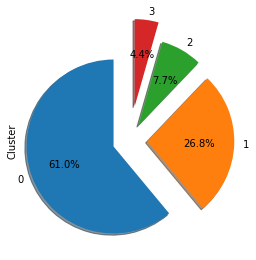

In [33]:
explode = (0.2, 0.2, 0.2, 0.4)

da['Cluster'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode, shadow=True, startangle=90)

mat.gca().set_aspect('equal')

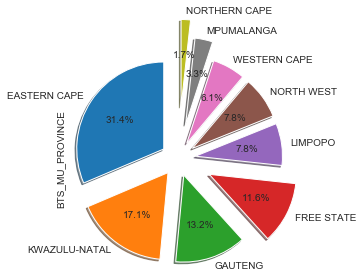

In [35]:
explode = (0.2, 0.2, 0.2, 0.4,0.2,0.2,0.2,0.4,0.6)
da['BTS_MU_PROVINCE'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode, shadow=True, startangle=90)
mat.gca().set_aspect('equal')

In [ ]:
#Variable standardization

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [41]:
da_1 = da.drop(['Cluster','BTS_MU_PROVINCE'],axis=1)

In [43]:
scaler.fit(da_1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scaled_features = scaler.transform(da_1)

In [45]:
df_feat = pd.DataFrame(scaled_features,columns=da_1.columns)
df_feat.head()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE
0,-0.231562,-0.453291,-0.381291,-0.209738,-0.168372,-0.781037,-0.099227,-0.327234,0.657451
1,-78.250722,0.578202,0.237596,-0.209738,-0.168372,0.830250,0.091324,1.603776,-0.142972
2,0.733045,-2.907384,-3.160093,2.831949,-0.168372,-7.046296,1.972221,-0.155589,1.873881
3,-0.319254,-9.726695,-1.640726,-0.209738,-0.168372,-7.242574,1.865621,-0.327234,1.091587
4,-0.319254,-0.875916,-9.373719,-0.209738,-0.168372,-3.832586,0.511351,-0.241412,0.549579


In [53]:
kvalues = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in kvalues]

In [54]:
score = [kmeans[i].fit(df_feat).score(df_feat) for i in range(len(kmeans))]

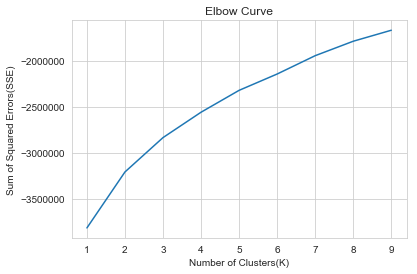

In [55]:
pl.plot(kvalues,score)
pl.xlabel('Number of Clusters(K)')
pl.ylabel('Sum of Squared Errors(SSE)')
pl.title('Elbow Curve')
pl.show()

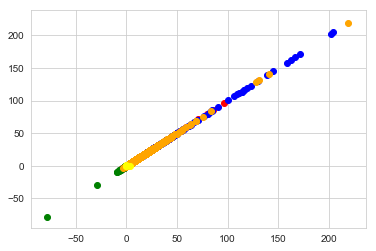

In [72]:
kmeans2=KMeans(n_clusters=4)
clusters=kmeans2.fit_predict(df_feat)
df_feat["Cluster"]=clusters

mat.scatter(df_feat.loc[df_feat.Cluster==0],df_feat.loc[df_feat.Cluster==0],color="red")
mat.scatter(df_feat.loc[df_feat.Cluster==1],df_feat.loc[df_feat.Cluster==1],color="green")
mat.scatter(df_feat.loc[df_feat.Cluster==2],df_feat.loc[df_feat.Cluster==2],color="blue")
mat.scatter(df_feat.loc[df_feat.Cluster==3],df_feat.loc[df_feat.Cluster==3],color="orange")
mat.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
mat.show()

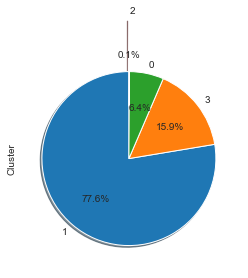

In [78]:
explode = (0.0, 0.0, 0.0, 0.6)

df_feat['Cluster'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode, shadow=True, startangle=90)

mat.gca().set_aspect('equal')

In [79]:
df_feat.drop('Cluster', axis=1).describe()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE
count,4.236210e+05,4.236210e+05,4.236210e+05,4.236210e+05,4.236210e+05,4.236210e+05,4.236210e+05,4.236210e+05,4.236210e+05
mean,-9.419125e-13,1.049522e-12,-4.181730e-13,-6.761699e-13,3.182880e-13,1.067716e-13,-9.378901e-18,-1.293545e-14,-1.946637e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-7.825072e+01,-9.726695e+00,-9.373719e+00,-2.097379e-01,-1.683721e-01,-7.242574e+00,-3.823304e-01,-3.272342e-01,-3.125976e-01
25%,-3.192535e-01,-4.532910e-01,-3.812905e-01,-2.097379e-01,-1.683721e-01,-7.927759e-01,-2.417041e-01,-3.272342e-01,-2.166529e-01
50%,-3.192535e-01,-4.518583e-01,-3.812905e-01,-2.097379e-01,-1.683721e-01,-3.946345e-01,-1.239439e-01,-1.555889e-01,-1.423329e-01
75%,-3.139920e-01,1.111647e-01,-1.430190e-01,-2.097379e-01,-1.683721e-01,4.686795e-01,4.346831e-02,1.605641e-02,1.524755e-02
max,9.652728e+01,2.187002e+02,1.411582e+02,8.398415e+01,7.543534e+01,3.279498e+01,2.017573e+02,1.450563e+02,2.043447e+02


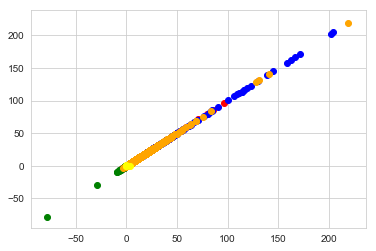

In [80]:
kmeans2=KMeans(n_clusters=4)
clusters=kmeans2.fit_predict(df_feat)
da["Cluster"]=clusters

mat.scatter(df_feat.loc[df_feat.Cluster==0],df_feat.loc[df_feat.Cluster==0],color="red")
mat.scatter(df_feat.loc[df_feat.Cluster==1],df_feat.loc[df_feat.Cluster==1],color="green")
mat.scatter(df_feat.loc[df_feat.Cluster==2],df_feat.loc[df_feat.Cluster==2],color="blue")
mat.scatter(df_feat.loc[df_feat.Cluster==3],df_feat.loc[df_feat.Cluster==3],color="orange")
mat.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
mat.show()

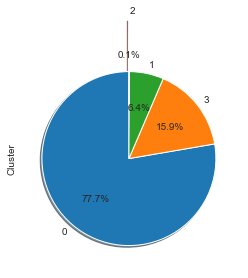

In [81]:
explode = (0.0, 0.0, 0.0, 0.6)

da['Cluster'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode, shadow=True, startangle=90)

mat.gca().set_aspect('equal')

In [83]:
da.head()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE,Cluster,BTS_MU_PROVINCE
1,50.0,0.0,0.0,0.0,0.0,50.438596,52.00,20.0,183.00,0,EASTERN CAPE
4,-44435.0,720.0,200.0,0.0,0.0,1775.124338,87.00,470.0,32.00,0,GAUTENG
8,600.0,-1713.0,-898.0,200.0,0.0,-6655.759243,432.48,60.0,412.48,0,KWAZULU-NATAL
11,0.0,-6473.0,-407.0,0.0,0.0,-6865.850082,412.90,20.0,264.90,0,KWAZULU-NATAL
12,0.0,-295.0,-2906.0,0.0,0.0,-3215.873152,164.15,40.0,162.65,0,KWAZULU-NATAL


In [86]:
da.loc[da['Cluster']== 0].head()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE,Cluster,BTS_MU_PROVINCE
1,50.0,0.0,0.0,0.0,0.0,50.438596,52.00,20.0,183.00,0,EASTERN CAPE
4,-44435.0,720.0,200.0,0.0,0.0,1775.124338,87.00,470.0,32.00,0,GAUTENG
8,600.0,-1713.0,-898.0,200.0,0.0,-6655.759243,432.48,60.0,412.48,0,KWAZULU-NATAL
11,0.0,-6473.0,-407.0,0.0,0.0,-6865.850082,412.90,20.0,264.90,0,KWAZULU-NATAL
12,0.0,-295.0,-2906.0,0.0,0.0,-3215.873152,164.15,40.0,162.65,0,KWAZULU-NATAL


In [87]:
da.loc[da['Cluster']== 1].head()

,REV_DATA_TOTAL,REV_VOICE_ONNET,REV_VOICE_OFFNET,REV_SMS_ONNET,REV_SMS_OFFNET,TOT_REV,SMILE_BALANCE,LOYALTY_POINTS_REDEEMED,LOYALTY_POINTS_BALANCE,Cluster,BTS_MU_PROVINCE
903,2778.0,690.0,2224.0,0.0,50.0,0.0,67.0000,40.0,1.0000,1,NaN
931,16418.0,1022.0,222.0,205.0,72.0,0.0,290.9400,120.0,166.1700,1,NaN
1009,14939.0,15274.0,4080.0,0.0,0.0,0.0,544.1215,350.0,363.7815,1,NaN
1060,10485.0,11297.0,1842.0,663.0,204.0,0.0,121.3189,400.0,4.3589,1,NaN
1140,55220.0,15500.0,9228.0,150.0,250.0,0.0,153.3062,1110.0,224.7562,1,NaN
